# Reconstructed observations - Phantom model
---

In [1]:
import matplotlib.pyplot as plt
import numpy             as np
import torch

from astropy     import units, constants
from pomme.model import TensorModel
from pomme.haar  import Haar
from pomme.plot  import plot_cube_2D
from pomme.utils import planck, T_CMB

from palettable.cubehelix import cubehelix2_16      # Nice colormap

In [3]:
obss_2 = torch.load('data/obs.pt')
obss   = torch.load('data/img.pt')
freqs  = torch.load('data/freqs.pt')

In [4]:
freqs

tensor([3.3796e+11, 3.3796e+11, 3.3796e+11, 3.3797e+11, 3.3797e+11, 3.3797e+11,
        3.3797e+11, 3.3797e+11, 3.3798e+11, 3.3798e+11, 3.3798e+11, 3.3798e+11,
        3.3798e+11, 3.3799e+11, 3.3799e+11, 3.3799e+11, 3.3799e+11, 3.3799e+11,
        3.3800e+11, 3.3800e+11, 3.3800e+11, 3.3800e+11, 3.3800e+11, 3.3801e+11,
        3.3801e+11])

In [50]:
velos = (freqs / 338019894000.0 - 1.0) * constants.c.si.value + 32900

In [51]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import numpy as np
import torch
import plons

from matplotlib.lines import Line2D
from astropy          import constants, units

from pomme.model import TensorModel, SphericallySymmetric
from pomme.loss  import Loss
from pomme.haar  import Haar

In [52]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [53]:
obss_2 - obss_2.min()

tensor([[[0.0049, 0.0052, 0.0047,  ..., 0.0049, 0.0042, 0.0047],
         [0.0052, 0.0057, 0.0047,  ..., 0.0049, 0.0038, 0.0045],
         [0.0055, 0.0061, 0.0047,  ..., 0.0047, 0.0032, 0.0042],
         ...,
         [0.0032, 0.0034, 0.0024,  ..., 0.0047, 0.0053, 0.0036],
         [0.0029, 0.0037, 0.0023,  ..., 0.0046, 0.0047, 0.0036],
         [0.0030, 0.0040, 0.0029,  ..., 0.0043, 0.0042, 0.0039]],

        [[0.0053, 0.0057, 0.0049,  ..., 0.0048, 0.0040, 0.0046],
         [0.0059, 0.0062, 0.0050,  ..., 0.0046, 0.0034, 0.0043],
         [0.0061, 0.0065, 0.0051,  ..., 0.0044, 0.0028, 0.0038],
         ...,
         [0.0028, 0.0038, 0.0018,  ..., 0.0055, 0.0054, 0.0036],
         [0.0025, 0.0042, 0.0020,  ..., 0.0051, 0.0047, 0.0037],
         [0.0026, 0.0045, 0.0029,  ..., 0.0045, 0.0041, 0.0041]],

        [[0.0058, 0.0059, 0.0052,  ..., 0.0045, 0.0039, 0.0043],
         [0.0065, 0.0063, 0.0053,  ..., 0.0042, 0.0033, 0.0038],
         [0.0067, 0.0063, 0.0054,  ..., 0.0040, 0.0028, 0.

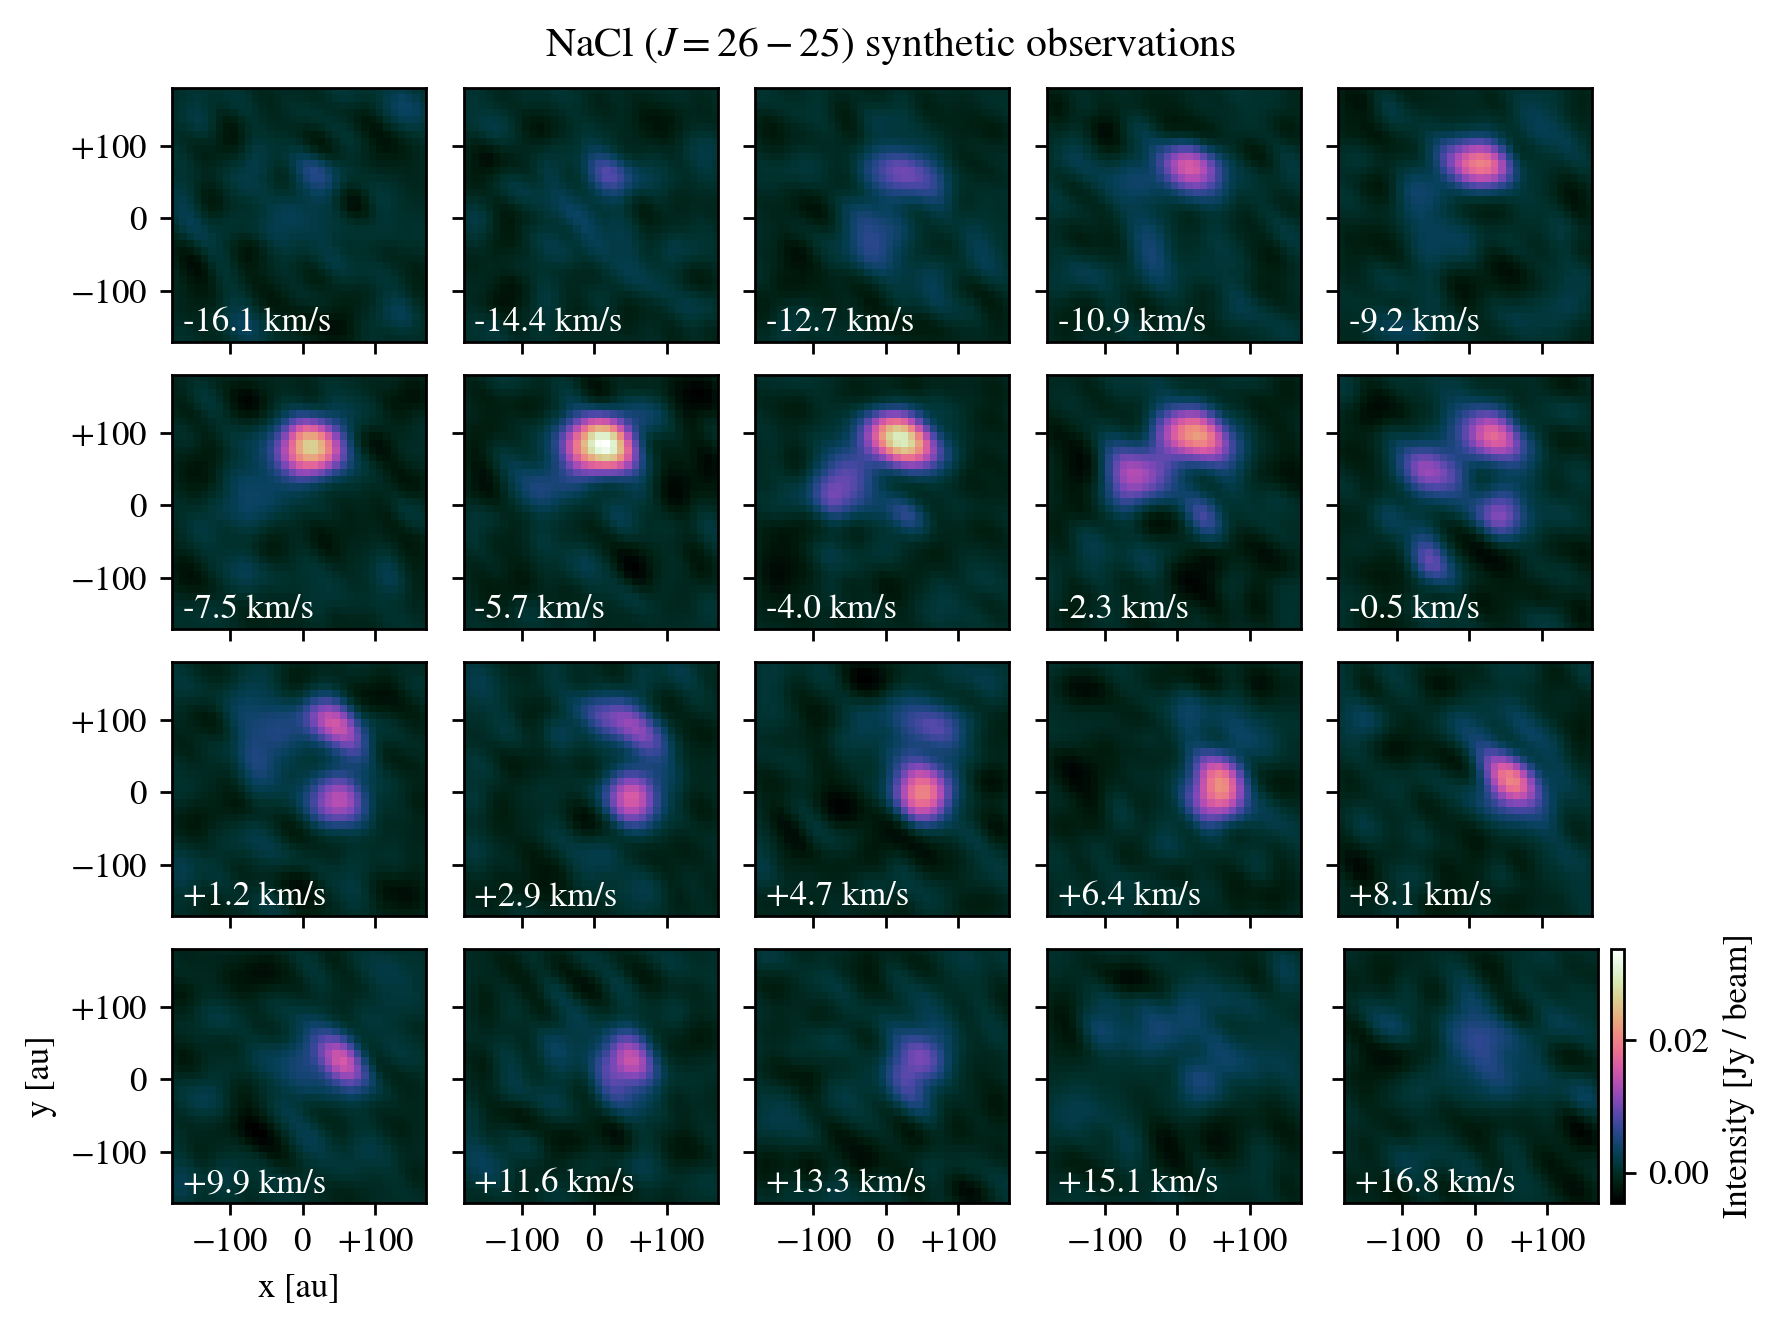

In [66]:
obs = obss_2.flip([0,2])

vmin = obs.min()
vmax = obs.max()

fig, axes = plt.subplots(
    nrows       =   4,
    ncols       =   5,
    dpi         = 250,
    sharex      = True,
    sharey      = True,
    figsize     = (7, 5.2),
    # gridspec_kw = {'left':0, 'right':0.1, 'top':0.1, 'bottom':0}, #{'wspace':-1, 'hspace':-1},
    layout      = 'constrained'
)

fig.suptitle('NaCl $(J=26-25)$ synthetic observations')

for i, ax in enumerate(axes.ravel()):
    pcm = ax.imshow(obs[:,:,i+2], vmin=vmin, vmax=vmax, cmap=cubehelix2_16.mpl_colormap)
    ax.text(+1, +33, f'{velos[i+2]/1000:+.1f} km/s', color='white')
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
    ax.set_xticks([7.5, 17.5, 27.5], ['$-100$', '$0$', '$+100$'])
    ax.set_yticks([7.5, 17.5, 27.5], ['$+100$', '$0$', '$-100$'])
    
axes[3,0].set_xlabel('x [au]')
axes[3,0].set_ylabel('y [au]')

fig.colorbar(pcm, ax=ax, location='right', shrink=1.0, pad=0.05, label='Intensity [Jy / beam]')

plt.savefig('IKTau_NaCl_obs_2.png', dpi=360)

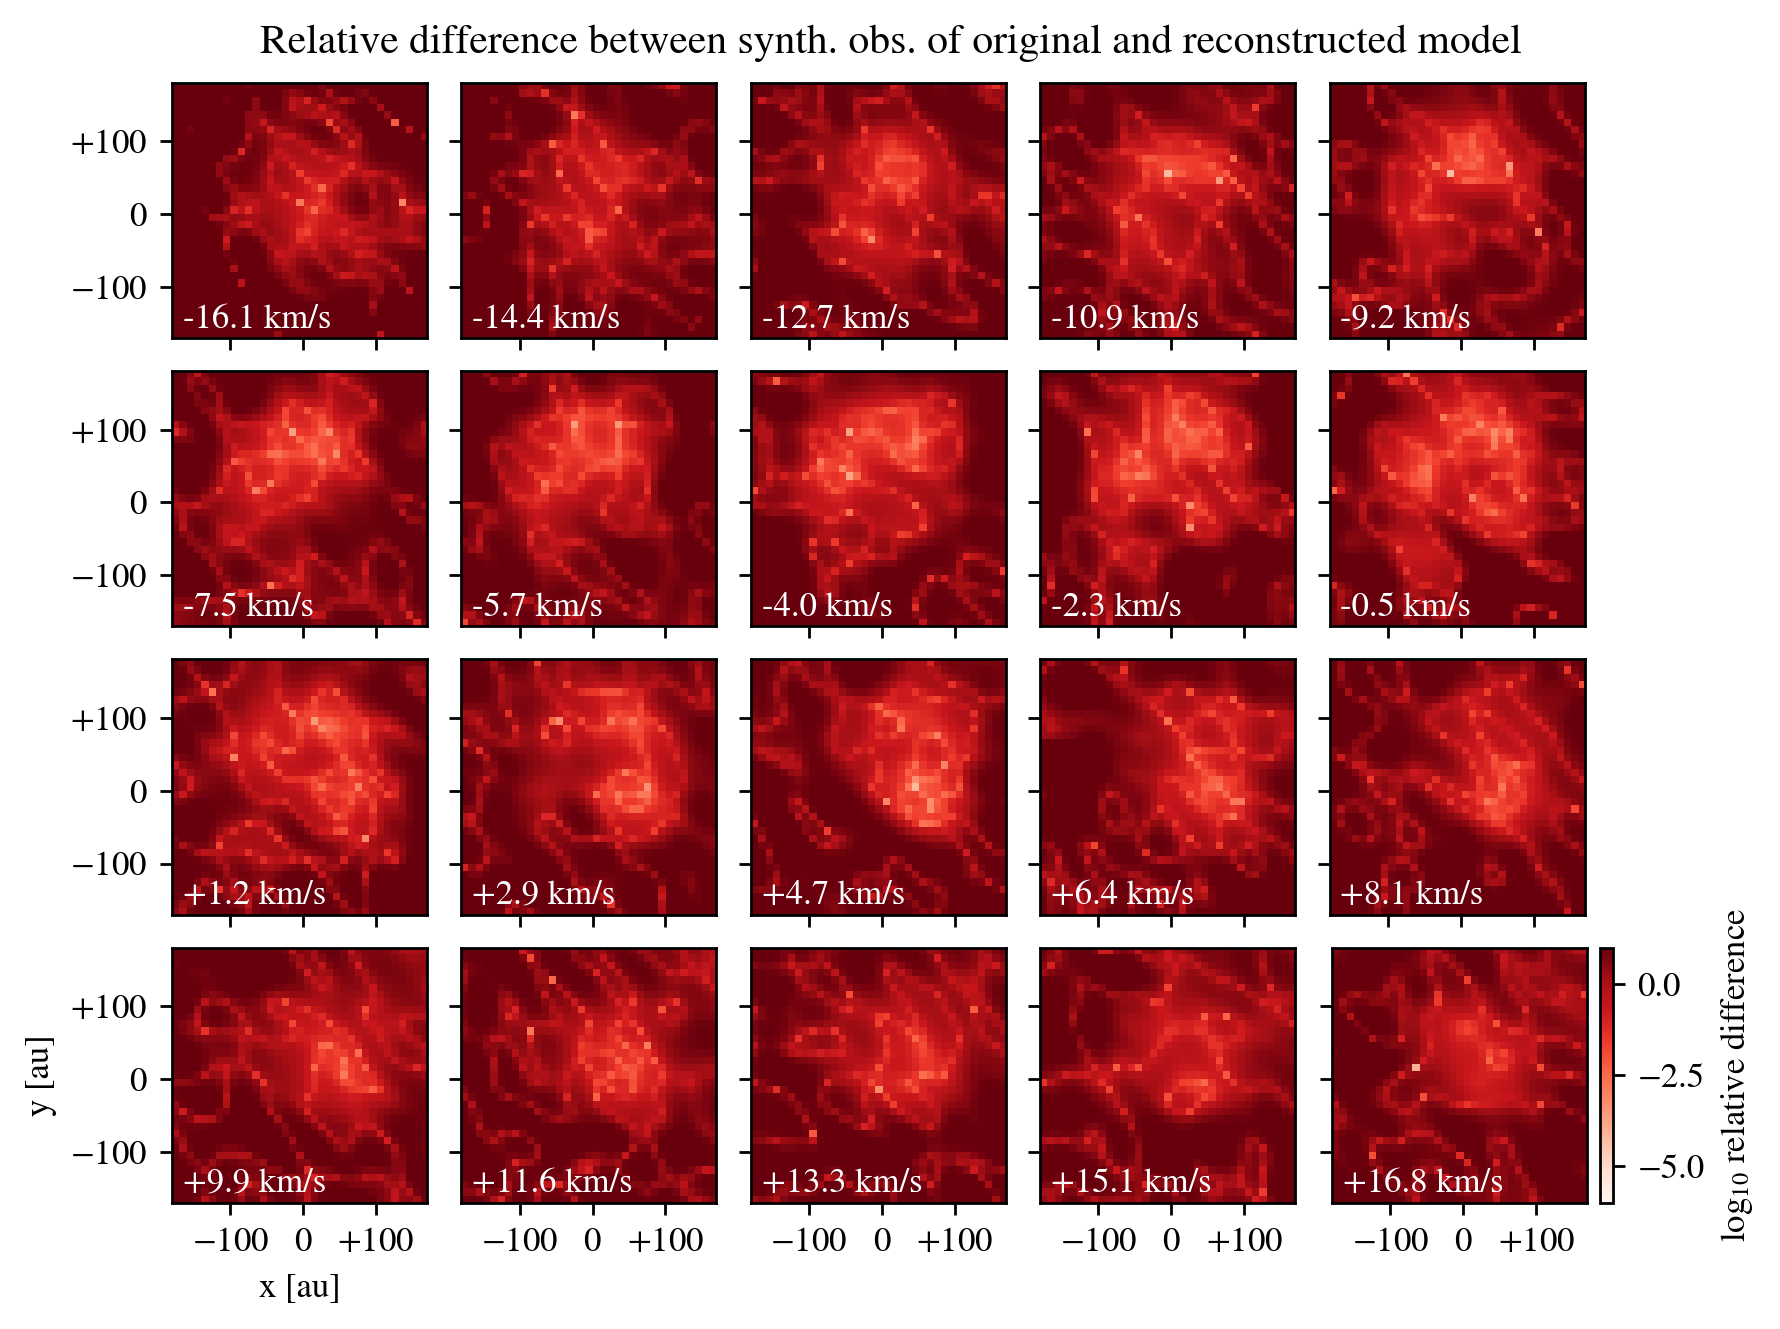

In [65]:
obs = np.abs(((obss-obss_2)/obss).data).flip([0,2])

vmin = -6.0#np.log10(obs.min())
vmax =  1.0 #np.log10(obs.max())

fig, axes = plt.subplots(
    nrows       =   4,
    ncols       =   5,
    dpi         = 250,
    sharex      = True,
    sharey      = True,
    figsize     = (7, 5.2),
    gridspec_kw = {'wspace':-1.00, 'hspace':-1.00},
    layout      = 'constrained'
)

for i, ax in enumerate(axes.ravel()):
    pcm = ax.imshow(np.log10(obs[:,:,i+2]), vmin=vmin, vmax=vmax, cmap='Reds')
    ax.text(+1, +33, f'{velos[i+2]/1000:+.1f} km/s', color='white')
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
    ax.set_xticks([7.5, 17.5, 27.5], ['$-100$', '$0$', '$+100$'])
    ax.set_yticks([7.5, 17.5, 27.5], ['$+100$', '$0$', '$-100$'])
    
axes[3,0].set_xlabel('x [au]')
axes[3,0].set_ylabel('y [au]')

fig.suptitle('Relative difference between synth. obs. of original and reconstructed model')

fig.colorbar(pcm, ax=ax, location='right', shrink=1.0, pad=0.05, label='log$_{10}$ relative difference')

plt.savefig('IKTau_NaCl_obs_rec.png', dpi=360)

In [56]:
obs.min()

tensor(4.4366e-05)

In [58]:

obs.max()

tensor(680.4091)